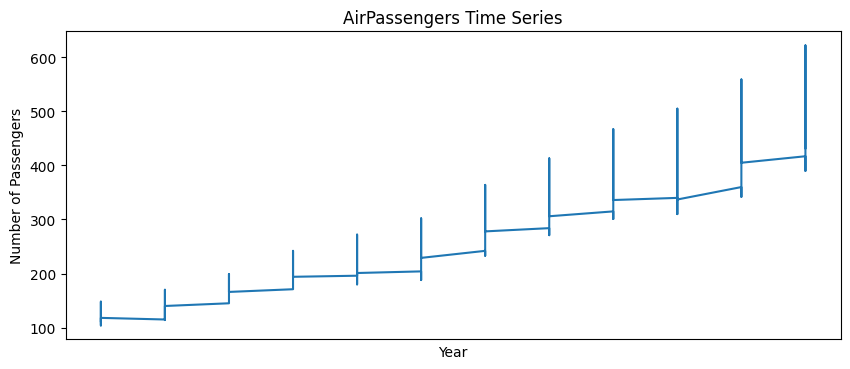

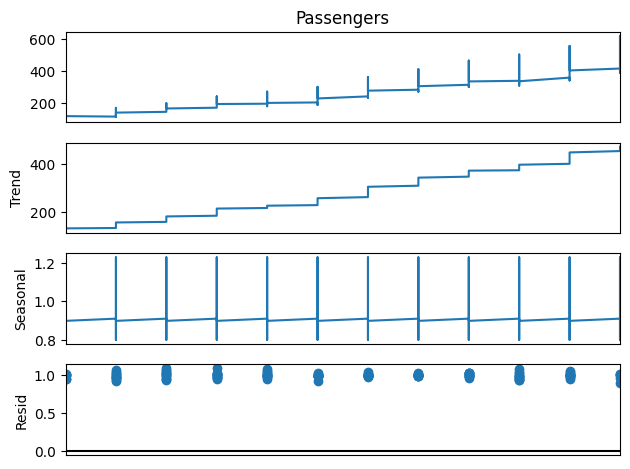

In [1]:
# Q6: Load and Decompose AirPassengers dataset
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load dataset
data = get_rdataset('AirPassengers').data
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(data['Passengers'])
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

# Decompose
result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
result.plot()
plt.show()


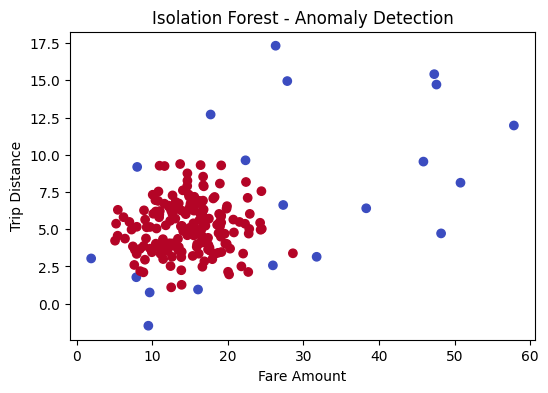

In [2]:
# Q7: Isolation Forest Anomaly Detection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create synthetic taxi fare dataset
np.random.seed(42)
fare = np.random.normal(15, 5, 200)      # typical fare range
distance = np.random.normal(5, 2, 200)   # trip distance
# Add anomalies
fare[190:] = fare[190:] * 3
distance[190:] = distance[190:] * 2
X = np.column_stack((fare, distance))

# Apply Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
y_pred = clf.fit_predict(X)

# Plot results
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Isolation Forest - Anomaly Detection")
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


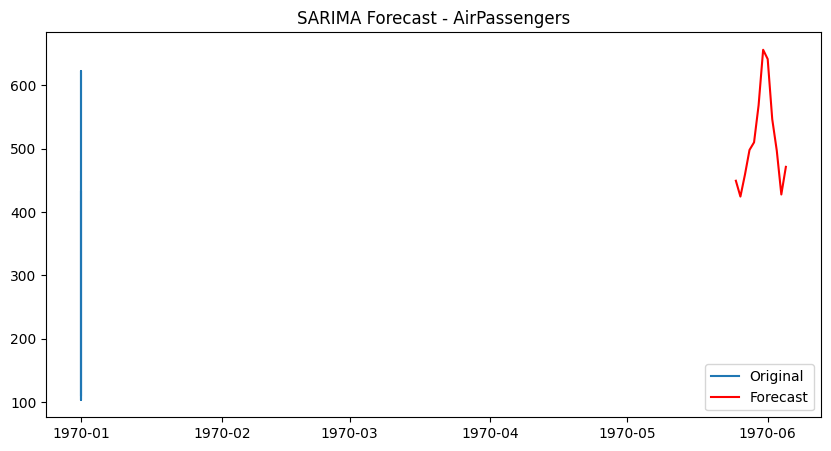

In [3]:
# Q8: SARIMA Forecast for Next 12 Months
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Use same AirPassengers data
series = data['Passengers']

# Fit SARIMA model
model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast next 12 months
forecast = results.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title("SARIMA Forecast - AirPassengers")
plt.legend()
plt.show()


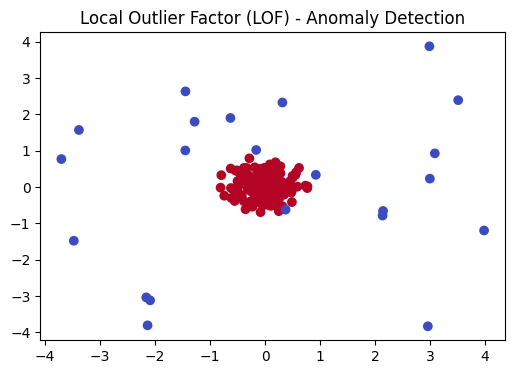

In [4]:
# Q9: Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

# Synthetic numeric data
X = 0.3 * np.random.randn(200, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X, X_outliers]

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# Visualize
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.show()


/tmp/ipython-input-1694379915.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_rng = pd.date_range(start='2024-01-01', end='2024-02-01', freq='15T')


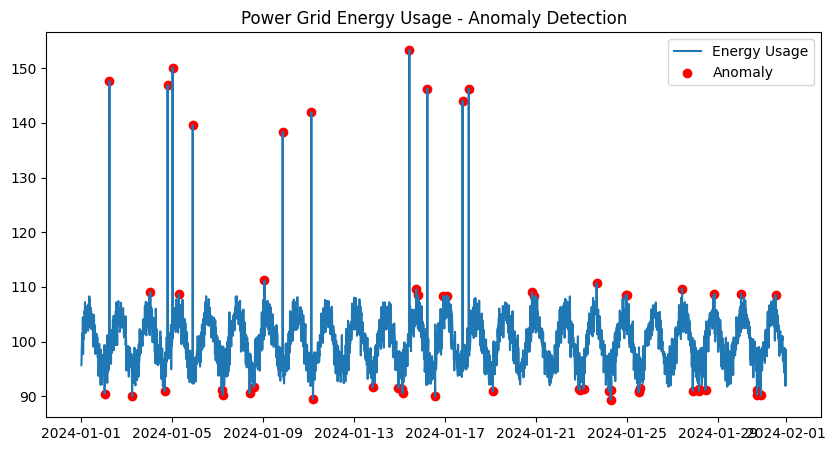

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [5]:
# Q10: Power Grid Monitoring Simulation
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Generate simulated power grid dataset
np.random.seed(42)
date_rng = pd.date_range(start='2024-01-01', end='2024-02-01', freq='15T')
data = pd.DataFrame(date_rng, columns=['timestamp'])
data['region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(data))
data['temperature'] = np.random.normal(25, 5, size=len(data))
data['humidity'] = np.random.uniform(40, 80, size=len(data))
data['energy_usage'] = 100 + 5 * np.sin(np.arange(len(data)) / 20) + np.random.normal(0, 2, size=len(data))

# Add anomalies
data.loc[data.sample(10).index, 'energy_usage'] *= 1.5

# --- Anomaly Detection ---
model = IsolationForest(contamination=0.02, random_state=42)
data['anomaly'] = model.fit_predict(data[['energy_usage']])

# Visualize anomalies
plt.figure(figsize=(10, 5))
plt.plot(data['timestamp'], data['energy_usage'], label='Energy Usage')
plt.scatter(data.loc[data['anomaly'] == -1, 'timestamp'],
            data.loc[data['anomaly'] == -1, 'energy_usage'],
            color='red', label='Anomaly')
plt.title("Power Grid Energy Usage - Anomaly Detection")
plt.legend()
plt.show()

# --- Short-Term Forecasting (SARIMAX) ---
series = data.set_index('timestamp')['energy_usage']
model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 96))  # 96 = 1 day (15-min intervals)
results = model.fit(disp=False)
forecast = results.forecast(steps=96)

plt.figure(figsize=(10, 5))
plt.plot(series[-500:], label='Recent Data')
plt.plot(forecast, color='red', label='Next 24 Hours Forecast')
plt.title("SARIMAX Forecast - Energy Demand")
plt.legend()
plt.show()
